In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-ind-covid2019/Unemployment_Rate_upto_11_2020.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/kaggle/input/unemployment-in-ind-covid2019/Unemployment_Rate_upto_11_2020.csv')

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
round(df.describe(),2)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.00,267.00,267.00,267.00,267.00
mean,12.24,13962105.72,41.68,22.83,80.53
std,10.80,13366318.36,7.85,6.27,5.83
min,0.50,117542.00,16.77,10.85,71.19
25%,4.84,2838930.50,37.26,18.11,76.09
50%,9.65,9732417.00,40.39,23.61,79.02
75%,16.76,21878686.00,44.06,27.28,85.28
max,75.85,59433759.00,69.69,33.78,92.94


In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
df.shape

(267, 9)

In [9]:
df=  df.rename(columns= {df.columns[0]: 'State', df.columns[6]:'Region', df.columns[3]: 'EUR', df.columns[5]:'ELPR', df.columns[4]:'Estimated_Employed'})
df.head()

,State,Date,Frequency,EUR,Estimated_Employed,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [10]:
df['State'].value_counts()

State
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [11]:
df.head()

,State,Date,Frequency,EUR,Estimated_Employed,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [12]:
region_analysis= df.groupby(['Region'])[['EUR', 'Estimated_Employed','ELPR']].mean().reset_index()
region_analysis= round(region_analysis,2)
region_analysis

,Region,EUR,Estimated_Employed,ELPR
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


In [13]:
corr= df[['EUR','Estimated_Employed', 'ELPR','longitude','latitude']].corr()
corr

,EUR,Estimated_Employed,ELPR,longitude,latitude
EUR,1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated_Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
ELPR,-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


<Axes: >

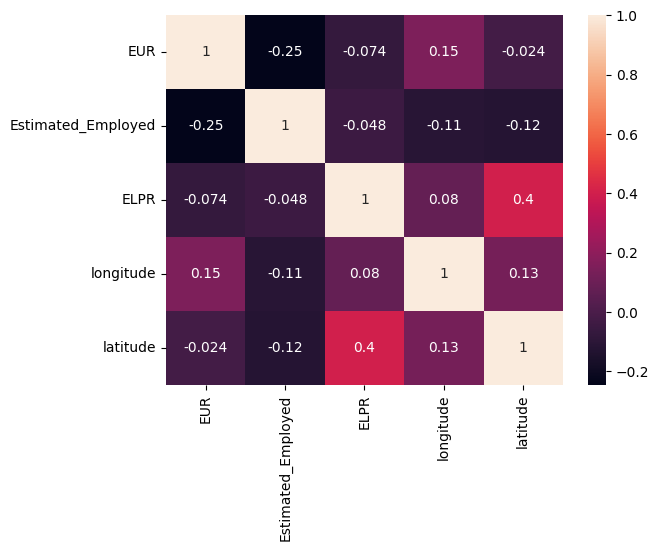

In [14]:
sns.heatmap(corr, annot= True)

In [15]:
import plotly.express as px

In [16]:
fig= px.box(df, x= 'State', y='EUR', title= "Unemployement in different states",
           color= 'State', template= 'plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [17]:
fig= px.bar(df, x= 'Region', y= 'EUR', title= 'Unemployement by Region', color= 'Region')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [27]:
unemp= df[['EUR', 'State']]
avg_unemp= unemp.groupby('State').mean().reset_index()
avg_unemp= avg_unemp.sort_values('EUR')
fig= px.bar(df, x= 'State', y= 'EUR', color= 'State', title= 'Average unemployement rate by States')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [32]:
unempl= df[['Region', 'State', 'EUR', 'ELPR','Estimated_Employed']]
unemp1= unempl.groupby(['Region', 'State'])['EUR'].mean().reset_index()
fig= px.sunburst(unemp1, path= ['Region', 'State'], values= 'EUR', height=700, title= 'Unemployement wrt to Region and State')
fig.show()